In [2]:
%load_ext autoreload
%autoreload 2

import sys
if '..' not in sys.path:
    sys.path.append('..')

In [61]:
import conllu

with open('../data/ud/en_ewt-ud-train.conllu', 'r') as f:
    sentences = conllu.parse(f.read())

In [2]:
!python ../dep.py ../data/en_ewt-ud-train.conllu ../data/ud.jsonl --weight=0.1

100%|███████████████████████████████████| 12544/12544 [00:04<00:00, 2549.80it/s]
generated 12544 noising trajectories
avg length 5.66047512755102


In [62]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

with open('../data/ud/en_ewt-ud-dev.conllu', 'r') as f:
    sentences = conllu.parse(f.read())
    
detok = TreebankWordDetokenizer()

sentences = [detok.detokenize([t['form'] for t in sent]) for sent in sentences]

In [65]:
with open('../data/ud/dev.txt', 'w') as f:
    for sent in sentences:
        f.write(sent)
        f.write('\n')

In [10]:
from transformers import BertTokenizer

tok = BertTokenizer.from_pretrained('bert-base-uncased')

ids = tok(sentences)

(array([895., 532., 295., 155.,  66.,  35.,  11.,   6.,   4.,   2.]),
 array([ 3. , 12.3, 21.6, 30.9, 40.2, 49.5, 58.8, 68.1, 77.4, 86.7, 96. ]),
 <BarContainer object of 10 artists>)

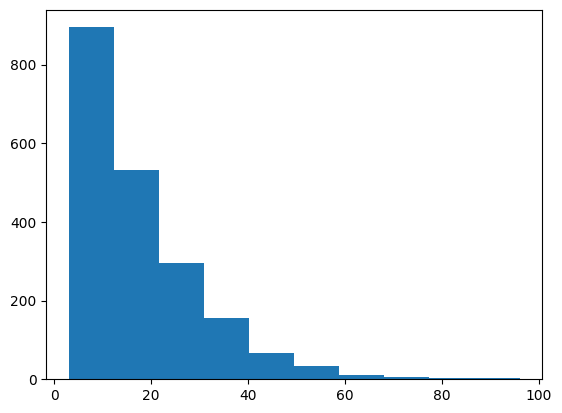

In [13]:
import matplotlib.pyplot as plt

plt.hist([len(id) for id in ids['input_ids']])

In [25]:
from model import Evolver
from data import TrainLoader
from train import train_evolver
from torch.optim import AdamW
from transformers import BertTokenizer

evolver = Evolver(
    d_model=512,
    nhead=8,
    max_len=64,
    encoder_layers=6,
    decoder_layers=6,
    device='cpu'
)

optim = AdamW(evolver.parameters(), lr=3e-4)

train_loader = TrainLoader.from_disk(
    path='../data/ud/ud.jsonl',
    bsz=128,
    max_len=64,
    tokenizer=BertTokenizer.from_pretrained('bert-base-cased')
)

Tokenizing inputs: 100%|██████████| 12544/12544 [00:12<00:00, 970.66it/s] 


In [58]:
train_evolver(
    evolver, optim, train_loader, None,
    epochs=1,
    grad_accum_steps=1,
    checkpoint_at=1,
    eval_at=1e10,
    num_particles=3,
    threshold=1,
    temperature=0.7,
    device='cpu',
    prefix='ud-cpu'
)

INFO:train:starting epoch: 1


tensor([-0.5643, -1.5343, -1.5343], grad_fn=<SubBackward0>)
tensor([-0.1877, -2.4584, -2.4584], grad_fn=<SubBackward0>)
tensor([-2.1201, -0.8210, -0.8210], grad_fn=<SubBackward0>)
tensor([-1.0986, -1.0986, -1.0986], grad_fn=<SubBackward0>)
tensor([-1.0986, -1.0986, -1.0986], grad_fn=<SubBackward0>)
tensor([-1.0986, -1.0986, -1.0986], grad_fn=<SubBackward0>)
tensor([-1.0986, -1.0986, -1.0986], grad_fn=<SubBackward0>)
tensor([-1.0986, -1.0986, -1.0986], grad_fn=<SubBackward0>)
tensor([-0.9040, -1.6601, -0.9040], grad_fn=<SubBackward0>)
tensor([-0.9044, -1.6585, -0.9044], grad_fn=<SubBackward0>)
tensor([-0.9015, -1.6709, -0.9015], grad_fn=<SubBackward0>)
tensor([-0.9156, -1.6120, -0.9156], grad_fn=<SubBackward0>)
tensor([-1.7024, -1.7024, -0.4533], grad_fn=<SubBackward0>)
tensor([-1.5927, -1.5927, -0.5221], grad_fn=<SubBackward0>)
tensor([-1.2527e+01, -1.2527e+01, -7.6294e-06], grad_fn=<SubBackward0>)
tensor([-1.2440e+01, -1.2440e+01, -7.8678e-06], grad_fn=<SubBackward0>)
tensor([-1.2398e

KeyboardInterrupt: 